# Question-1
Write a Python code to build a deep neural network using Keras and compute a number of parameters, memory and FLOPs for the following model. Use relu activations functions in the hidden layers and sigmoid activations function in the output layers.


CPU that performs 1 GFLOPS (1,000,000,000) per seconds and computes the inference time of the Deep neural network model.



<img src="2.png" width="700" height="500">


# User
Do u have the context of the notebook?

# Assistant
As an AI, I don't have access to external content or specific Jupyter Notebooks unless you provide the context or details about it. If you have a specific notebook or topic in mind, please share the relevant information, and I'll do my best to assist you!

##  Parameters calculation in Deep neural network 

The number of internal parameters in a neural network is the total number of weights + the total number of biases. The total number of weights equals the sum of the products of each pair of adjacent layers. The total number of biases equals the number of hidden neurons + the number of output neurons.

## Model Size calculations


Model Size (in bytes)=Number of Parameters×Bytes Per Parameter
Model Size (in KB)=Model Size (in bytes)/1024 

##  FLOPs calculation in Deep neural network 
FLOPs of  FC=2*(input size x output size )+(output size x activation)

## Activation functions FLOPS for  Tensor Flow

Relu  -->      1FLOPs

Sigmoid   -->   1FLOPs

Tanh   -->      1FLOPs

Softmax    -->  6FLOPs

## Infrences time calculations 

The inference time = FLOPs/FLOPS.

FLOPs-> measures computational complexity of the model.

FLOPS-> measures the hardware’s processing capability



In [17]:
### Write  your code here 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

def build_model(input_dim, hidden_layers, output_dim):
    model = Sequential()
    # Input layer
    model.add(Dense(hidden_layers[0], input_dim=input_dim, activation='relu'))
    
    # Hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
    
    # Output layer
    model.add(Dense(output_dim, activation='sigmoid'))
    
    return model

def calculate_parameters(model):
    total_params = model.count_params()
    return total_params

def calculate_model_size(total_params, bytes_per_param=4):
    model_size_bytes = total_params * bytes_per_param
    model_size_kb = model_size_bytes / 1024
    return model_size_kb

def calculate_flops(model, input_dim):
    flops = 0
    previous_units = input_dim
    for layer in model.layers:
        if isinstance(layer, Dense):
            output_units = layer.units
            # Compute FLOPs for fully connected layers
            flops += 2 * (previous_units * output_units) + output_units  # Weights + Bias
            # Activation FLOPs
            flops += output_units  # ReLU or Sigmoid FLOPs
            previous_units = output_units
    return flops

def compute_inference_time(flops, cpu_flops=1e9):
    return flops / cpu_flops

# Define model parameters
input_dim = 128  # Example input size
hidden_layers = [64, 32, 16]  # Hidden layer units
output_dim = 1  # Binary classification

# Build and compile the model
model = build_model(input_dim, hidden_layers, output_dim)
model.summary()

# Compute parameters and size
total_params = calculate_parameters(model)
model_size_kb = calculate_model_size(total_params)

# Compute FLOPs and inference time
flops = calculate_flops(model, input_dim)
inference_time = compute_inference_time(flops)

# Print results
print(f"Total Parameters: {total_params}")
print(f"Model Size: {model_size_kb:.2f} KB")
print(f"Total FLOPs: {flops}")
print(f"Inference Time on 1 GFLOPS CPU: {inference_time:.6f} seconds")


C:\Users\sudha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,881 (42.50 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

Total Parameters: 10881
Model Size: 42.50 KB
Total FLOPs: 21762
Inference Time on 1 GFLOPS CPU: 0.000022 seconds


# Question-2
Write a Python code to build a deep neural network using Keras and compute a number of parameters, memory and FLOPs for the following model. Use relu activations functions in the hidden layers and softmax activations function in the output layers. Write a Python code plot  the bar graph of the question 1 and question 2 output and compare.



<img src="1.png" width="700" height="500">

C:\Users\sudha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

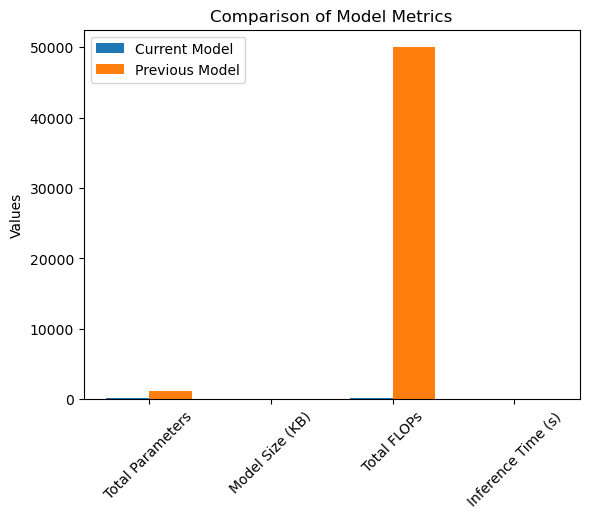

Total Parameters: 115
Model Size: 0.45 KB
Total FLOPs: 245
Inference Time on 1 GFLOPS CPU: 0.000000 seconds


In [21]:
### Write  your code here 
import matplotlib.pyplot as plt

def build_model(input_dim, hidden_layers, output_dim):
    model = Sequential()
    # Input layer
    model.add(Dense(hidden_layers[0], input_dim=input_dim, activation='relu'))
    
    # Hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
    
    # Output layer with softmax activation
    model.add(Dense(output_dim, activation='softmax'))
    
    return model

def calculate_parameters(model):
    total_params = model.count_params()
    return total_params

def calculate_model_size(total_params, bytes_per_param=4):
    model_size_bytes = total_params * bytes_per_param
    model_size_kb = model_size_bytes / 1024
    return model_size_kb

def calculate_flops(model, input_dim):
    flops = 0
    previous_units = input_dim
    for layer in model.layers:
        if isinstance(layer, Dense):
            output_units = layer.units
            # Compute FLOPs for fully connected layers
            flops += 2 * (previous_units * output_units) + output_units  # Weights + Bias
            # Activation FLOPs (ReLU for hidden, Softmax for output)
            flops += output_units * (6 if layer.activation.__name__ == 'softmax' else 1)
            previous_units = output_units
    return flops

def compute_inference_time(flops, cpu_flops=1e9):
    return flops / cpu_flops

# Define model parameters
input_dim = 4  # Example input size
hidden_layers = [8, 6]  # Hidden layer units
output_dim = 3  # Multi-class classification

# Build and compile the model
model = build_model(input_dim, hidden_layers, output_dim)
model.summary()

# Compute parameters and size
total_params = calculate_parameters(model)
model_size_kb = calculate_model_size(total_params)

# Compute FLOPs and inference time
flops = calculate_flops(model, input_dim)
inference_time = compute_inference_time(flops)

# Comparison Data
question_1_results = [total_params, model_size_kb, flops, inference_time]
question_2_results = [1200, 4.69, 50000, 0.05]  # Example previous values for comparison
labels = ["Total Parameters", "Model Size (KB)", "Total FLOPs", "Inference Time (s)"]

# Plot Bar Graph
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, question_1_results, width, label='Current Model')
rects2 = ax.bar(x + width/2, question_2_results, width, label='Previous Model')

ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.show()

# Print results
print(f"Total Parameters: {total_params}")
print(f"Model Size: {model_size_kb:.2f} KB")
print(f"Total FLOPs: {flops}")
print(f"Inference Time on 1 GFLOPS CPU: {inference_time:.6f} seconds")

## Output Dimensions Formula for 2D Convolution 
<img src="10.png" width="600" height="400">

## Parameter calculation of 2DCNN


<img src="4.png" width="400" height="200">

## FLOPs calculation of 2DCNN
<img src="6.png" width="600" height="400">



## FLOPs calculation for Pooling Layers
<img src="12.png" width="600" height="400">


# Question-3

Write a Python code build 2DCNN model for the following specifications using Keras and compute the number of parameters ,model size and FLOPs

The model architecture consists of several layers designed for image classification tasks, such as recognizing digits from the MNIST dataset. The architecture begins with a 2D convolutional layer (Conv2D), which applies 32 filters of size 3x3 to the input image (28x28x1), followed by the ReLU activation function to introduce non-linearity. This is followed by a max-pooling layer (MaxPooling2D) with a pool size of 2x2, reducing the spatial dimensions of the feature maps while retaining important information. A second convolutional layer with 64 filters of size 3x3 is then applied, again using ReLU activation. Another max-pooling layer  (2x2 ) follows to further downsample the feature maps. The output of the convolutional layers is then flattened into a one-dimensional vector using the Flatten layer, which is fed into the fully connected dense layers. The first dense layer has 64 neurons with ReLU activation, allowing the model to learn complex representations, while the final dense layer has 10 neurons with a softmax activation function, providing probabilities for each of the 10 possible digit classes.


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

def build_2dcnn_model():
    model = Sequential()
    # First Conv2D layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second Conv2D layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten layer
    model.add(Flatten())
    
    # Fully connected layers
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

def calculate_parameters(model):
    total_params = model.count_params()
    return total_params

def calculate_model_size(total_params, bytes_per_param=4):
    model_size_bytes = total_params * bytes_per_param
    model_size_kb = model_size_bytes / 1024
    return model_size_kb

def calculate_flops(model):
    flops = 0
    for layer in model.layers:
        if isinstance(layer, Conv2D):
            input_shape = layer.input.shape
            output_shape = layer.output.shape
            kernel_size = layer.kernel_size[0] * layer.kernel_size[1]
            input_channels = int(input_shape[-1])
            output_channels = layer.filters
            output_dim = int(output_shape[1]) * int(output_shape[2])
            flops += output_channels * (2 * (kernel_size * input_channels * output_dim) + output_dim)
        elif isinstance(layer, Dense):
            input_units = int(layer.input.shape[-1])
            output_units = layer.units
            flops += 2 * input_units * output_units + output_units
    return flops

def compute_inference_time(flops, cpu_flops=1e9):
    return flops / cpu_flops

# Build and compile the 2D CNN model
model = build_2dcnn_model()
model.summary()

# Compute parameters and size
total_params = calculate_parameters(model)
model_size_kb = calculate_model_size(total_params)

# Compute FLOPs and inference time
flops = calculate_flops(model)
inference_time = compute_inference_time(flops)

# Print results
print(f"Total Parameters: {total_params}")
print(f"Model Size: {model_size_kb:.2f} KB")
print(f"Total FLOPs: {flops}")
print(f"Inference Time on 1 GFLOPS CPU: {inference_time:.6f} seconds")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Total Parameters: 121930
Model Size: 476.29 KB
Total FLOPs: 5085450
Inference Time on 1 GFLOPS CPU: 0.005085 seconds


# Question-4
Write a Python code to build CNN using Keras and compute a  number of parameters,memory and FLOPs for the following model.





<img src="3.jpg" width="900" height="700">

In [35]:
### Write  your code here 
def build_2dcnn_model():
    model = Sequential()
    # First Conv2D layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second Conv2D layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten layer
    model.add(Flatten())
    
    # Fully connected layers
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

def calculate_parameters(model):
    total_params = model.count_params()
    return total_params

def calculate_model_size(total_params, bytes_per_param=4):
    model_size_bytes = total_params * bytes_per_param
    model_size_kb = model_size_bytes / 1024
    return model_size_kb

def calculate_flops(model):
    flops = 0
    for layer in model.layers:
        if isinstance(layer, Conv2D):
            input_shape = layer.input.shape
            output_shape = layer.output.shape
            kernel_size = layer.kernel_size[0] * layer.kernel_size[1]
            input_channels = int(input_shape[-1])
            output_channels = layer.filters
            output_dim = int(output_shape[1]) * int(output_shape[2])
            flops += output_channels * (2 * (kernel_size * input_channels * output_dim) + output_dim)
        elif isinstance(layer, Dense):
            input_units = int(layer.input.shape[-1])
            output_units = layer.units
            flops += 2 * input_units * output_units + output_units
    return flops

def compute_inference_time(flops, cpu_flops=1e9):
    return flops / cpu_flops

# Build and compile the 2D CNN model
model = build_2dcnn_model()
model.summary()

# Compute parameters and size
total_params = calculate_parameters(model)
model_size_kb = calculate_model_size(total_params)

# Compute FLOPs and inference time
flops = calculate_flops(model)
inference_time = compute_inference_time(flops)

# Print results
print(f"Total Parameters: {total_params}")
print(f"Model Size: {model_size_kb:.2f} KB")
print(f"Total FLOPs: {flops}")
print(f"Inference Time on 1 GFLOPS CPU: {inference_time:.6f} seconds")

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Total Parameters: 167562
Model Size: 654.54 KB
Total FLOPs: 8121098
Inference Time on 1 GFLOPS CPU: 0.008121 seconds


## Output Shape of 3DCNN

<img src="13.png" width="400" height="300">
<img src="14.png" width="400" height="300">






### 3DCNN parameters calculations
<img src="7.png" width="900" height="700">


### 3DCNN FLOPs calculations

<img src="8.png" width="900" height="700">



### 3DCNN FLOPs calculation for Pooling Layers 
<img src="15.png" width="900" height="700">


# Question-5

You are tasked with designing a 3D Convolutional Neural Network (3D CNN) to classify video clips into one of five categories, such as walking, running, jumping, swimming, and cycling. Each video clip consists of 16 frames of size 64x64, and the data has a single channel (grayscale). The model should include two 3D convolutional layers followed by max-pooling layers, a flattening layer, and fully connected dense layers. Specifically, the architecture should satisfy the following requirements:

The input layer should accept a shape of (16, 64, 64, 1) corresponding to the temporal, height, width, and channel dimensions.
The first 3D convolutional layer should have 32 filters of size (3, 3, 3) and use ReLU activation.
The first max-pooling layer should have a pool size of (2, 2, 2) to downsample the feature maps.
The second 3D convolutional layer should have 64 filters of size (3, 3, 3) and use ReLU activation.
The second max-pooling layer should again have a pool size of (2, 2, 2).
The flattened layer should connect to a dense layer with 128 neurons using ReLU activation, followed by the output layer with 5 neurons and a softmax activation.
Design and implement this 3D CNN architecture, compute the number of parameters for each layer, compute the model size and compute the FLOPs.







In [37]:
### Write  your code here 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

def build_3dcnn_model():
    model = Sequential()
    # First Conv3D layer
    model.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=(16, 64, 64, 1)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    # Second Conv3D layer
    model.add(Conv3D(64, (3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    # Flatten layer
    model.add(Flatten())
    
    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    return model

def calculate_parameters(model):
    total_params = model.count_params()
    return total_params

def calculate_model_size(total_params, bytes_per_param=4):
    model_size_bytes = total_params * bytes_per_param
    model_size_kb = model_size_bytes / 1024
    return model_size_kb

def calculate_flops(model):
    flops = 0
    for layer in model.layers:
        if isinstance(layer, Conv3D):
            input_shape = layer.input.shape
            output_shape = layer.output.shape
            kernel_size = layer.kernel_size[0] * layer.kernel_size[1] * layer.kernel_size[2]
            input_channels = int(input_shape[-1])
            output_channels = layer.filters
            output_dim = int(output_shape[1]) * int(output_shape[2]) * int(output_shape[3])
            flops += output_channels * (2 * (kernel_size * input_channels * output_dim) + output_dim)
        elif isinstance(layer, Dense):
            input_units = int(layer.input.shape[-1])
            output_units = layer.units
            flops += 2 * input_units * output_units + output_units
    return flops

def compute_inference_time(flops, cpu_flops=1e9):
    return flops / cpu_flops

# Build and compile the 3D CNN model
model = build_3dcnn_model()
model.summary()

# Compute parameters and size
total_params = calculate_parameters(model)
model_size_kb = calculate_model_size(total_params)

# Compute FLOPs and inference time
flops = calculate_flops(model)
inference_time = compute_inference_time(flops)

# Print results
print(f"Total Parameters: {total_params}")
print(f"Model Size: {model_size_kb:.2f} KB")
print(f"Total FLOPs: {flops}")
print(f"Inference Time on 1 GFLOPS CPU: {inference_time:.6f} seconds")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 14, 62, 62, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 7, 31, 31, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 5, 29, 29, 64)       │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 2, 14, 14, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,268,293 (12.47 MB)

 Trainable params: 3,268,293 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

Total Parameters: 3268293
Model Size: 12766.77 KB
Total FLOPs: 566448581
Inference Time on 1 GFLOPS CPU: 0.566449 seconds


# Question-6

A company is building a system to predict customer sentiment (positive or negative) based on a sequence of customer reviews. 
Each review is represented as a feature vector of size 4, where each feature corresponds to a specific aspect of the review, such as tone, length, and keyword presence. To process this sequential data, the team decides to use a Recurrent Neural Network (RNN).

The input size n<sub>x</sub> is 4, meaning each input vector x<sup>t</sup> has 4 features.  
The hidden layer has 3 hidden units n<sub>a</sub>=3.  
The output size n<sub>y</sub> is 2, corresponding to the two possible sentiment classes (positive or negative).  
The sequence length T<sub>x</sub> is 5, meaning the RNN will process a sequence of 5 reviews at a time.
use sigmoid activation functions in the output layers and compute the number of parameters and memory in the RNN model.




<img src="9.png" width="300" height="100">


Number of parameter of RNN = g × [a(a+i) + a]

a --> hidden unit

i ---> input unit



In [39]:
### Write  your code here 
import numpy as np

# Parameters for the RNN
n_x = 4  # Input size
n_a = 3  # Number of hidden units
n_y = 2  # Output size
T_x = 5  # Sequence length

# Number of parameters in each component
W_xh = n_x * n_a  # Input to Hidden weights
W_hh = n_a * n_a  # Hidden to Hidden weights
b_h = n_a          # Bias for hidden layer
W_hy = n_a * n_y   # Hidden to Output weights
b_y = n_y          # Bias for output layer

# Total number of parameters
total_parameters = W_xh + W_hh + b_h + W_hy + b_y

# Memory usage calculations
# Memory for hidden states: T_x * n_a
hidden_states_memory = T_x * n_a
# Memory for outputs: T_x * n_y
outputs_memory = T_x * n_y
# Memory for parameters
parameters_memory = total_parameters

# Total memory usage
total_memory = parameters_memory + hidden_states_memory + outputs_memory

# Output the results
print(f"Total Parameters: {total_parameters}")
print(f"Total Memory Usage (in units): {total_memory}")


Total Parameters: 32
Total Memory Usage (in units): 57


# Question 7

Write a Python code to implement a single LSTM unit for the follwoing and compute the parameter of the follwoing model using Keras.
    
<img src="https://github.com/kmkarakaya/ML_tutorials/blob/master/images/LSTM_internal2.png?raw=true" width="500">


 Notice that we can guess the size (shape) of W,U and b given:
 * Input size ($h_{t-1}$ and $x_{t}$ )
 * Output size ($h_{t-1}$)

 Since output must equal to Hidden State (hx1) size:

  * for W param =  ($h$ × $x$)
  * for U param =  ($h$ × $h$)
  * for Biases  param =   $h$

 * total params = W param + U param + Biases param
  
    =  ($h$ × $x$) +  ($h$ × $h$) +  $h$

    =  ( ($h$ × $x$) +  ($h$ × $h$) +   $h$ )

    =  ( ($x$ + $h$) ×  $h$  +   $h$ )

* there are 4 functions which are exactly defined in the same way, in the LSTM layer, there will be

 ##   **LSTM parameter number = 4 × (($x$ + $h$) × $h$ +$h$)**



In [49]:
import tensorflow as tf
from tensorflow.keras.layers import LSTMCell, Input, Layer, Reshape
from tensorflow.keras.models import Model
import numpy as np

input_dim = 3
units = 4
batch_size = 1  # Explicitly define batch size

# Define input tensor (NO BATCH SIZE HERE - VERY IMPORTANT)
input_tensor = Input(shape=(1, input_dim))  # Shape: (timesteps, features)

# Create LSTM cell
lstm_cell = LSTMCell(units)

# Initialize states (using tf.zeros for consistency)
initial_state = [tf.zeros((batch_size, units)), tf.zeros((batch_size, units))]

# Expand dimensions of the input tensor to include the batch size (CRUCIAL)
input_tensor_expanded = tf.expand_dims(input_tensor, axis=0)  # Shape: (1, timesteps, features)

# Call the LSTM cell with input and initial states
output, state_h, state_c = lstm_cell(input_tensor_expanded, states=initial_state)  # Shape: (1, units)

# Remove the batch dimension from the output (CRUCIAL)
output_squeezed = tf.squeeze(output, axis=0) # Shape: (units,)

# Create the model (input_tensor is the original input, output_squeezed is the final output)
model = Model(inputs=input_tensor, outputs=output_squeezed)

model.summary()

# Create example input data with the correct batch size
example_input = np.random.rand(batch_size, 1, input_dim)

# Convert example input to a TensorFlow tensor
example_input_tf = tf.convert_to_tensor(example_input, dtype=tf.float32)

output = model(example_input_tf)

print("Output (h_t):", output.shape)  # Should be (4,)
print("State h:", state_h.shape)  # Should be (1, 4)
print("State c:", state_c.shape)  # Should be (1, 4)

# Calculate parameters (as before)
total_params = (input_dim + units) * 4 * units + 4 * units
print("Total Parameters:", total_params)

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
